<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/diabetes_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## `데이터셋 로드

In [2]:
df = pd.read_csv("/content/drive/MyDrive/boostcourse_data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y= df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size= 0.2, random_state =42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 학습과 예측하기

In [10]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =42)
model

DecisionTreeClassifier(random_state=42)

###for 문으로 최적의 max_depth 찾기

In [21]:
for max_depth in range(3, 12) :
  model = DecisionTreeClassifier(max_depth= max_depth, random_state =42)
  y_predict= model.fit(X_train, y_train).predict(X_test)
  score = accuracy_score(y_test,y_predict) * 100
  print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
param_grid={'max_depth': range(3,12), 'max_features' : [0.3,0.5,0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1,verbose=1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [25]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [26]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [27]:
clf.best_score_

0.8664934026389444

In [29]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.010322,0.003856,0.006230,0.002892,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.012946,0.005185,0.004709,0.002771,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.010628,0.003545,0.008783,0.005000,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.006413,0.000907,0.003070,0.000124,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.005700,0.000351,0.003055,0.000073,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [30]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [31]:
clf.score(X_test,y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [66]:
max_depth = np.random.randint(3,20,10)
max_depth

array([14, 12, 18, 14, 10,  6, 11,  3, 10, 18])

In [67]:
max_features = np.random.uniform(0.7,1.0,100)

In [68]:
param_distributions = {'max_depth':max_depth,'max_features' :max_features, 'min_samples_split': list(range(2,7))}
param_distributions

{'max_depth': array([14, 12, 18, 14, 10,  6, 11,  3, 10, 18]),
 'max_features': array([0.72093959, 0.70441475, 0.96223931, 0.77137066, 0.83588907,
        0.84264133, 0.88498163, 0.84451645, 0.90460343, 0.80610323,
        0.83032597, 0.99461317, 0.77699983, 0.97555065, 0.93891436,
        0.83499659, 0.71434951, 0.74399424, 0.71021288, 0.91064393,
        0.96215716, 0.84003645, 0.79025056, 0.79013466, 0.82163717,
        0.88039559, 0.89858988, 0.95478927, 0.9479892 , 0.88372963,
        0.96151067, 0.73579549, 0.86895982, 0.78875642, 0.7095293 ,
        0.80296729, 0.87395913, 0.89268344, 0.76191303, 0.84596095,
        0.97336708, 0.93991221, 0.9615824 , 0.91881281, 0.89880341,
        0.88159689, 0.9261069 , 0.98380054, 0.85222251, 0.88666905,
        0.84135641, 0.75133152, 0.94485458, 0.75737492, 0.91556591,
        0.86504997, 0.82232191, 0.99797453, 0.77916745, 0.9565436 ,
        0.99460066, 0.97978769, 0.88599078, 0.7118896 , 0.77620331,
        0.99732756, 0.79428068, 0.772

In [74]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(model,param_distributions, n_iter=1000,scoring='accuracy',n_jobs=-1,cv=5,random_state=42)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([14, 12, 18, 14, 10,  6, 11,  3, 10, 18]),
                                        'max_features': array([0.72093959, 0.70441475, 0.96223931, 0.77137066, 0.83588907,
       0.84264133, 0.88498163, 0.84451645, 0.90460343, 0.80610323,
       0.83032597, 0.99461317, 0.77699983, 0.97555065, 0.938914...
       0.74581986, 0.75008472, 0.70828446, 0.90836741, 0.8322224 ,
       0.85609198, 0.73652269, 0.91321801, 0.90592605, 0.85217925,
       0.72718185, 0.82139756, 0.72266672, 0.74605156, 0.88083656,
       0.75352494, 0.9126741 , 0.78736927, 0.90733771, 0.7548707 ,
       0.9723765 , 0.91533546, 0.97347967, 0.8113241 , 0.94641396,
       0.9037776 , 0.95507229, 0.93301358, 0.7772882 , 0.86162225]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [75]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8560919829139398, 'max_depth': 10}

In [76]:
clf.best_score_

0.8713847794215648

In [77]:
clf.score(X_test, y_test)

0.8571428571428571

In [78]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
322,0.011474,0.005231,0.009348,0.005495,4,0.840036,10,"{'min_samples_split': 4, 'max_features': 0.840...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
870,0.006115,0.000116,0.003325,0.000074,4,0.834997,10,"{'min_samples_split': 4, 'max_features': 0.834...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
60,0.006257,0.000419,0.004580,0.001989,4,0.856092,10,"{'min_samples_split': 4, 'max_features': 0.856...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
520,0.005928,0.000226,0.003198,0.000127,4,0.790251,10,"{'min_samples_split': 4, 'max_features': 0.790...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
243,0.005647,0.000256,0.002929,0.000151,4,0.834997,10,"{'min_samples_split': 4, 'max_features': 0.834...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1


###학습 및 예측하기

In [11]:
#학습을 시키기
model.fit(X_train,y_train )

DecisionTreeClassifier(random_state=42)

In [15]:
#feature_names를 지정하기위해
feature_names = X_train.columns.tolist()

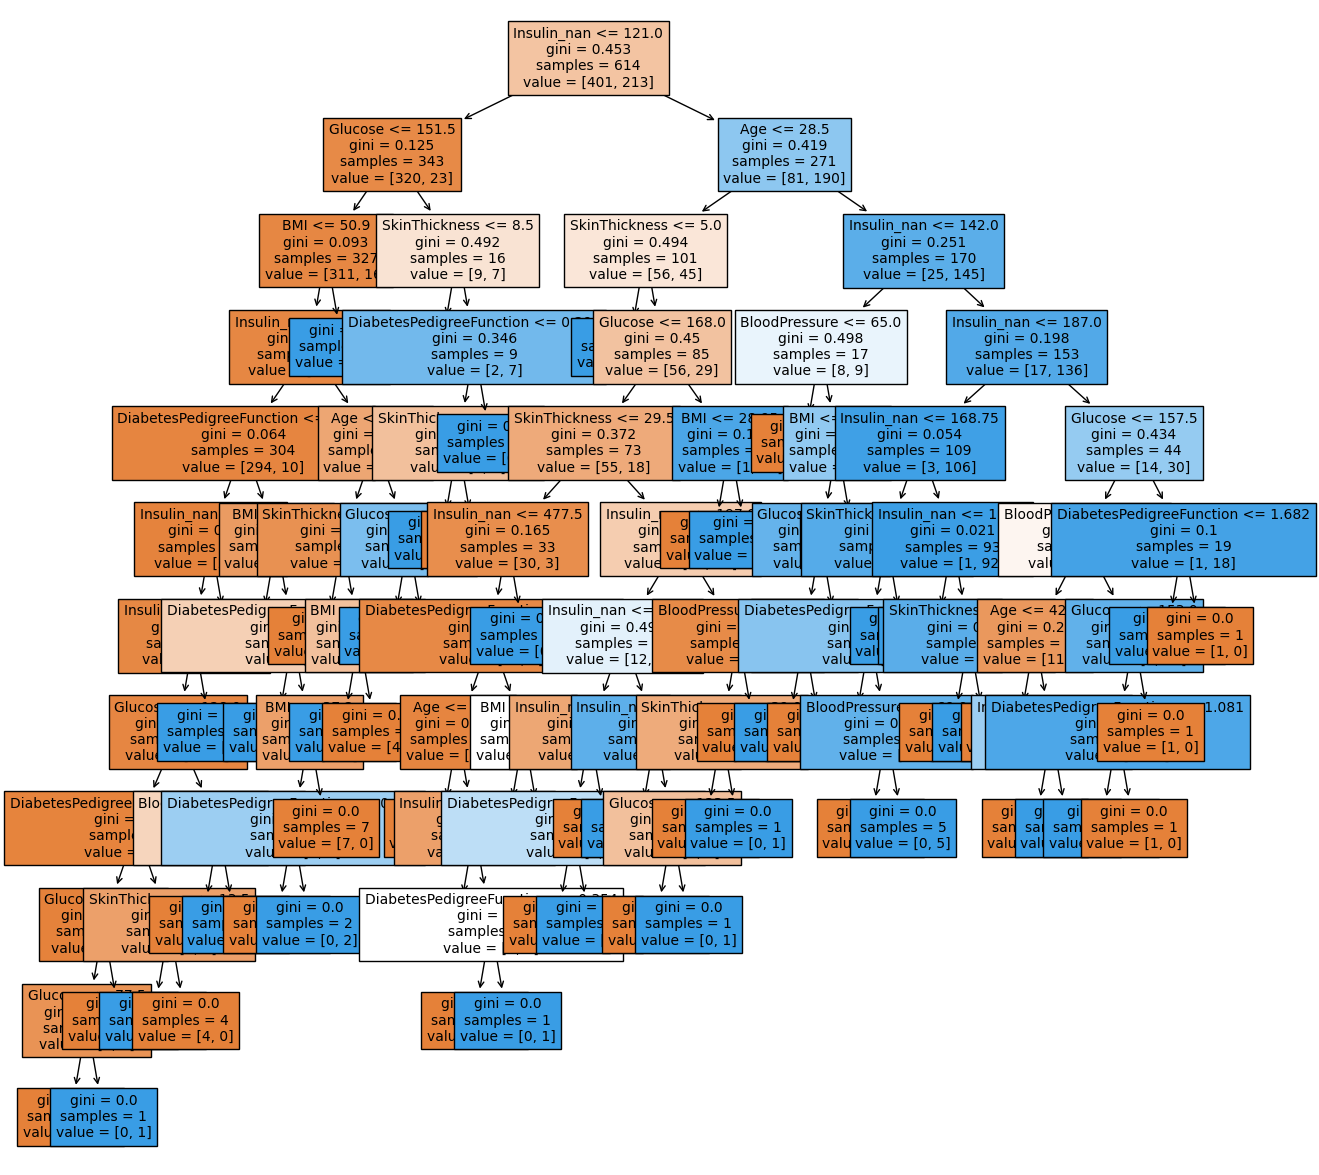

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
tree = plot_tree(model,feature_names=feature_names , fontsize=10,filled= True)

In [12]:
#예측을 하고 결과를 y_predict에 담기
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [13]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum() #abs로 절댓값을 구해 더해 개수 구하기

28

In [14]:
# accuracy score를 구합니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

81.81818181818183

In [59]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([17,  6, 16, 19,  8, 13,  5, 16, 12, 10])

In [60]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [61]:
param_distributions = {"max_depth" :max_depth,
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([17,  6, 16, 19,  8, 13,  5, 16, 12, 10]),
 'max_features': array([0.93281683, 0.9179461 , 0.97702339, 0.86229011, 0.87634647,
        0.71504303, 0.99189673, 0.77970277, 0.73005347, 0.82822546,
        0.74630604, 0.88374043, 0.91997669, 0.92268733, 0.75749225,
        0.81684811, 0.88200337, 0.99039256, 0.89193095, 0.99847537,
        0.97039785, 0.99520298, 0.8582508 , 0.93689499, 0.79025563,
        0.76977456, 0.74374369, 0.97754336, 0.83279955, 0.82019303,
        0.78024268, 0.85163626, 0.85396304, 0.81652828, 0.70349795,
        0.98581831, 0.75624988, 0.79345345, 0.93743102, 0.88600248,
        0.87914201, 0.84980443, 0.93676862, 0.8312094 , 0.82899373,
        0.78844162, 0.72222015, 0.83433884, 0.73919079, 0.93205726,
        0.75327768, 0.74703893, 0.94834901, 0.90980423, 0.9048949 ,
        0.82282854, 0.76879077, 0.90006781, 0.85035983, 0.89499289,
        0.76294618, 0.8865702 , 0.85473337, 0.87173394, 0.82158135,
        0.96808132, 0.92485329, 0.835

In [62]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([17,  6, 16, 19,  8, 13,  5, 16, 12, 10]),
                                        'max_features': array([0.93281683, 0.9179461 , 0.97702339, 0.86229011, 0.87634647,
       0.71504303, 0.99189673, 0.77970277, 0.73005347, 0.82822546,
       0.74630604, 0.88374043, 0.91997669, 0.92268733, 0.75749225...
       0.81857464, 0.86437242, 0.94360066, 0.94481597, 0.79785069,
       0.70235037, 0.72848457, 0.92505777, 0.81727939, 0.87959794,
       0.83024804, 0.93473527, 0.76116974, 0.83658363, 0.88352049,
       0.87597837, 0.73008852, 0.72129223, 0.88931337, 0.96981352,
       0.89187866, 0.79097488, 0.76782569, 0.83388363, 0.90144427,
       0.94670653, 0.88109244, 0.99487851, 0.79247495, 0.83425643]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [63]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8302480351400001, 'max_depth': 10}

In [64]:
clf.best_score_

0.8713847794215648

In [65]:
clf.score(X_test, y_test)

0.8571428571428571

In [66]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
222,0.012899,0.000675,0.006022,0.003417,4,0.882003,10,"{'min_samples_split': 4, 'max_features': 0.882...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
485,0.005847,0.000175,0.003000,0.000127,4,0.849804,10,"{'min_samples_split': 4, 'max_features': 0.849...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
153,0.005846,0.000154,0.003185,0.000122,4,0.830248,10,"{'min_samples_split': 4, 'max_features': 0.830...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
920,0.006303,0.001030,0.003063,0.000092,4,0.816528,10,"{'min_samples_split': 4, 'max_features': 0.816...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
958,0.005546,0.000098,0.002919,0.000113,4,0.828994,10,"{'min_samples_split': 4, 'max_features': 0.828...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1


In [67]:
feature_names = X_train.columns.tolist()

In [68]:
from sklearn.tree import plot_tree

tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

NotFittedError: ignored